In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from geopy.geocoders import Nominatim

In [7]:
data = pd.read_csv("data_final.csv", sep = ",")

In [8]:
data

,District,population,e-rickshaw,Cars,lat,long
0,South,2731929,6066,621905,28.536316,77.221834
1,West,2543243,2773,221911,28.621899,77.087838
2,North West,3656539,5642,144130,28.749472,77.056533
3,North,887978,2388,240864,28.699381,77.203138
4,North East,2241624,4359,132895,28.700217,77.163790
5,East,1709346,1590,112168,28.614624,77.312158
6,South East,142004,2181,288054,28.731644,77.300851
7,South West,2292958,2554,87047,28.619930,77.248744
8,Central,582320,2548,363240,28.700217,77.163790


In [9]:
district=data['District'].tolist()
population=data['population'].tolist()
erick=data['e-rickshaw'].tolist()
cars=data['Cars'].tolist()

In [10]:
erick

[6066, 2773, 5642, 2388, 4359, 1590, 2181, 2554, 2548]

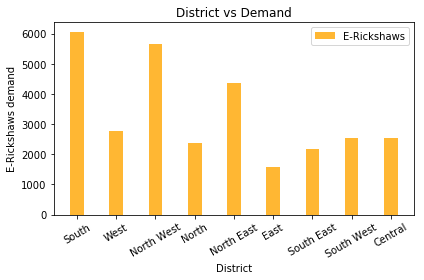

In [30]:
n_groups = 9
fig, ax = plt.subplots()
bar_width = 0.35
opacity = 0.8
index = np.arange(n_groups)
rects1 = plt.bar(index, erick, bar_width,
                 alpha=opacity,
                 color='orange',
                 label='E-Rickshaws')
 
plt.xlabel('District')
plt.ylabel('E-Rickshaws demand')
plt.title('District vs Demand')
plt.xticks(index, district, rotation = 30)
plt.legend()
 
plt.tight_layout()
plt.show()
fig.savefig('erickshaw.png')

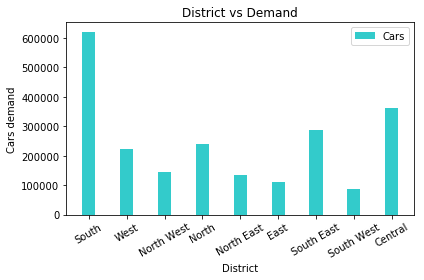

In [31]:
n_groups = 9
fig, ax = plt.subplots()
bar_width = 0.35
opacity = 0.8
index = np.arange(n_groups)
rects1 = plt.bar(index, cars, bar_width,
                 alpha=opacity,
                 color='c',
                 label='Cars')
 
plt.xlabel('District')
plt.ylabel('Cars demand')
plt.title('District vs Demand')
plt.xticks(index, district, rotation = 30)
plt.legend()
 
plt.tight_layout()
plt.show()
fig.savefig('cars.png')

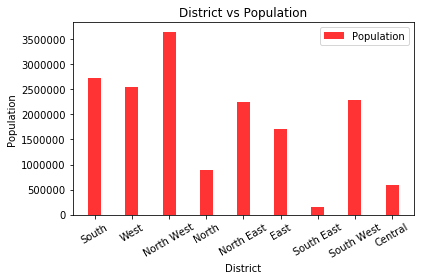

In [32]:
n_groups = 9
fig, ax = plt.subplots()
bar_width = 0.35
opacity = 0.8
index = np.arange(n_groups)
rects1 = plt.bar(index, population, bar_width,
                 alpha=opacity,
                 color='r',
                 label='Population')
 
plt.xlabel('District')
plt.ylabel('Population')
plt.title('District vs Population')
plt.xticks(index, district, rotation = 30)
plt.legend()
 
plt.tight_layout()
plt.show()
fig.savefig('population.png')

In [53]:
X = data[['lat','long']]
Y = data['e-rickshaw']+ data['Cars']

In [54]:
model = SVC(kernel = 'rbf')

In [55]:
model.fit(X, Y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [56]:
model.predict([[28.621899, 77.087838]])

array([224684], dtype=int64)

In [57]:
Y.nlargest(n = 9)

0    627971
8    365788
6    290235
3    243252
1    224684
2    149772
4    137254
5    113758
7     89601
dtype: int64

In [58]:
def no_of_station(score):
    if score>400000:
        return 4
    elif score<=400000 or score >250000:
        return 3
    elif score<=250000 or score>110000:
        return 2
    else:
        return 1

In [20]:
geolocator = Nominatim()

In [61]:
userinput = input("Enter location to build charge stations ")
location = geolocator.geocode(userinput)
#print((location.latitude, location.longitude))
prediction = model.predict([[location.latitude, location.longitude]])
print("Upto {} charge points recommended at {}".format(no_of_station(prediction), userinput))

Enter location to build charge stations rohini
Upto 3 charge points recommended at rohini
